In [3]:
import pandas as pd
import numpy as np 

df = pd.read_csv("/home/scholar/Documents/DOCS/AIDE/CSR302 DEXP/AirQualityUCI.csv", sep=';')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
df = df.drop(columns=["Unnamed: 15","Unnamed: 16"])

In [5]:
df = df.dropna()
print(df.isnull().sum().sum())

0


In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
# List of columns to convert
columns_to_convert = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]

# Replace ',' with '.' and convert to float
for col in columns_to_convert:
    df[col] = df[col].str.replace(",", ".").astype(float)

# Confirm changes
print(df.dtypes)


Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [8]:
# Convert 'Date' to YYYY-MM-DD format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True).dt.date


print(df.head())


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2004-03-10  18.00.00     2.6       1360.0     150.0      11.9   
1  2004-03-10  19.00.00     2.0       1292.0     112.0       9.4   
2  2004-03-10  20.00.00     2.2       1402.0      88.0       9.0   
3  2004-03-10  21.00.00     2.2       1376.0      80.0       9.2   
4  2004-03-10  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [9]:
# Convert 'Time' to proper time format (HH:MM:SS)
df["Time"] = df["Time"].str.replace(".", ":", regex=False)


print(df.head())


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1  2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2  2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3  2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4  2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [10]:
print(df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [11]:
missing_values = df.isna().sum()
print(missing_values)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [12]:
for col in df.columns:
    print(df[col].unique()[:10])  # Show only the first 10 unique values
    print("\n")


[datetime.date(2004, 3, 10) datetime.date(2004, 3, 11)
 datetime.date(2004, 3, 12) datetime.date(2004, 3, 13)
 datetime.date(2004, 3, 14) datetime.date(2004, 3, 15)
 datetime.date(2004, 3, 16) datetime.date(2004, 3, 17)
 datetime.date(2004, 3, 18) datetime.date(2004, 3, 19)]


['18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00'
 '00:00:00' '01:00:00' '02:00:00' '03:00:00']


[   2.6    2.     2.2    1.6    1.2    1.     0.9    0.6 -200.     0.7]


[1360. 1292. 1402. 1376. 1272. 1197. 1185. 1136. 1094. 1010.]


[150. 112.  88.  80.  51.  38.  31.  24.  19.  14.]


[11.9  9.4  9.   9.2  6.5  4.7  3.6  3.3  2.3  1.7]


[1046.  955.  939.  948.  836.  750.  690.  672.  609.  561.]


[ 166.  103.  131.  172.   89.   62.   45. -200.   21.   16.]


[1056. 1174. 1140. 1092. 1205. 1337. 1462. 1453. 1579. 1705.]


[ 113.   92.  114.  122.  116.   96.   77.   76.   60. -200.]


[1692. 1559. 1555. 1584. 1490. 1393. 1333. 1276. 1235. 1197.]


[1268.  972. 1074. 1203. 1110.  949.  733

In [13]:
garbage_value = -200  

# Count % of garbage values in each column  
(df == garbage_value).mean() * 100  


Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [14]:
columns_to_drop = (df == -200).mean() * 100 > 10
columns_to_drop = columns_to_drop[columns_to_drop].index
print(columns_to_drop) 


Index(['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], dtype='object')


In [15]:
df_cleaned = df.drop(columns=columns_to_drop)


In [16]:
df_cleaned.replace(-200, df_cleaned.median(numeric_only=True), inplace=True)


In [17]:
print((df_cleaned == -200).sum())


Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [22]:
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
print(df_cleaned.columns)


Index(['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [26]:
# Drop the "Date" and "Time" columns
df_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Move "DateTime" to the first column
col_order = ["DateTime"] + [col for col in df_cleaned.columns if col != "DateTime"]
df_cleaned = df_cleaned[col_order]

# Verify the changes
print(df_cleaned.head())


             DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1692.0       1268.0  13.6  48.9  0.7578  
1        1559.0        972.0  13.3  47.7  0.7255  
2        1555.0       1074.0  11.9  54.0  0.7502  
3        1584.0       1203.0  11.0  60.0  0.7867  
4        1490.0       1110.0  11.2  59.6  0.7888  


In [38]:
df_cleaned

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [53]:
# Ensure 'DateTime' is a datetime object
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'])

# Extract Day, Month, Year, and Day Name
df_cleaned['Day'] = df_cleaned['DateTime'].dt.day          # Extract Day
df_cleaned['Month'] = df_cleaned['DateTime'].dt.month      # Extract Month
df_cleaned['Year'] = df_cleaned['DateTime'].dt.year        # Extract Year
df_cleaned['WeekDay'] = df_cleaned['DateTime'].dt.day_name()  # Extract Day Name

# Reorder columns: Keep original columns first, then append extracted date components
cols = [col for col in df_cleaned.columns if col not in ['Day', 'Month', 'Year', 'WeekDay']]  # Keep existing columns
df_cleaned = df_cleaned[cols + ['Day', 'Month', 'Year', 'WeekDay']]  # Append extracted columns at the end

# Check the updated DataFrame
print(df_cleaned.head())


             DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year    WeekDay  
0        1692.0       1268.0  13.6  48.9  0.7578   10      3  2004  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255   10      3  2004  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502   10      3  2004  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867   10      3  2004  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888   10      3  2004  Wednesday  


In [54]:
df_cleaned

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,WeekDay
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,Monday


In [55]:




# Now filter the data by year
df_2004 = df_cleaned[df_cleaned["DateTime"].dt.year == 2004]
df_2005 = df_cleaned[df_cleaned["DateTime"].dt.year == 2005]


In [56]:
# Check if "Date" and "Time" exist before dropping
if "Date" in df_cleaned.columns and "Time" in df_cleaned.columns:
    df_cleaned.drop(columns=["Date", "Time"], inplace=True)

# Move "DateTime" to the first column
col_order = ["DateTime"] + [col for col in df_cleaned.columns if col != "DateTime"]
df_cleaned = df_cleaned[col_order]

# Apply the same to df_2004 and df_2005
for df in [df_2004, df_2005]:
    if "Date" in df.columns and "Time" in df.columns:
        df.drop(columns=["Date", "Time"], inplace=True)
    df = df[col_order]  # Rearrange columns

# Verify the changes
print(df_cleaned.head())
print(df_2004.head())
print(df_2005.head())


             DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Day  Month  Year    WeekDay  
0        1692.0       1268.0  13.6  48.9  0.7578   10      3  2004  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255   10      3  2004  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502   10      3  2004  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867   10      3  2004  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888   10      3  2004  Wednesday  
             DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMH

In [57]:
print("Descriptive Statistics for 2004:")
print(df_2004.describe())




Descriptive Statistics for 2004:
                  DateTime  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)  \
count                 7110  7110.000000  7110.000000    7110.000000   
mean   2004-08-05 20:30:00  1095.316034    10.543615     958.720534   
min    2004-03-10 18:00:00   647.000000     0.200000     397.000000   
25%    2004-05-23 19:15:00   936.000000     5.100000     767.250000   
50%    2004-08-05 20:30:00  1053.000000     8.600000     923.000000   
75%    2004-10-18 21:45:00  1221.000000    14.200000    1124.000000   
max    2004-12-31 23:00:00  2040.000000    63.700000    2214.000000   
std                    NaN   216.584105     7.504108     262.473608   

       PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)            T           RH  \
count   7110.000000   7110.000000  7110.000000  7110.000000  7110.000000   
mean     854.329677   1548.442475  1010.606610    20.744065    48.264037   
min      322.000000    682.000000   261.000000     1.200000     9.200000   
25%      685.000000   1

In [58]:
print("\nDescriptive Statistics for 2005:")
print(df_2005.describe())


Descriptive Statistics for 2005:
                  DateTime  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)  \
count                 2247  2247.000000  2247.000000    2247.000000   
mean   2005-02-16 19:00:00  1106.497997     8.270360     870.046729   
min    2005-01-01 00:00:00   715.000000     0.100000     383.000000   
25%    2005-01-24 09:30:00   958.000000     3.500000     683.000000   
50%    2005-02-16 19:00:00  1055.000000     6.800000     846.000000   
75%    2005-03-12 04:30:00  1222.000000    11.200000    1021.500000   
max    2005-04-04 14:00:00  1846.000000    43.000000    1831.000000   
std                    NaN   200.984394     6.381906     247.501593   

       PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)            T           RH  \
count   2247.000000   2247.000000  2247.000000  2247.000000  2247.000000   
mean     769.133511   1162.921673  1048.646195    10.458611    52.200712   
min      330.000000    551.000000   221.000000    -1.900000     9.900000   
25%      602.000000   

In [59]:
df_2004

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,WeekDay
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,2004-12-31 19:00:00,930.0,5.3,781.0,933.0,906.0,866.0,9.3,33.6,0.3958,31,12,2004,Friday
7106,2004-12-31 20:00:00,962.0,5.3,780.0,919.0,909.0,884.0,9.6,32.3,0.3871,31,12,2004,Friday
7107,2004-12-31 21:00:00,974.0,5.5,790.0,915.0,895.0,951.0,9.1,32.5,0.3766,31,12,2004,Friday
7108,2004-12-31 22:00:00,1055.0,5.6,791.0,845.0,936.0,1195.0,9.1,37.2,0.4310,31,12,2004,Friday


In [60]:
# Ensure only numeric columns are processed
numeric_cols = df_2004.select_dtypes(include=['number']).columns  # Select only numeric columns

for col in numeric_cols:
    med = df_2004[df_2004[col] != -200][col].median()  # Compute median for non -200 values
    df_2004[col].replace(-200, med, inplace=True)  # Replace -200 with median


/tmp/ipykernel_21052/4158851286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004[col].replace(-200, med, inplace=True)  # Replace -200 with median


In [61]:
# Ensure only numeric columns are processed
numeric_cols = df_2005.select_dtypes(include=['number']).columns  # Select only numeric columns

for col in numeric_cols:
    med = df_2005[df_2005[col] != -200][col].median()  # Compute median for non -200 values
    df_2005[col].replace(-200, med, inplace=True)  # Replace -200 with median


/tmp/ipykernel_21052/900081443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2005[col].replace(-200, med, inplace=True)  # Replace -200 with median


In [62]:
df_2005.describe()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year
count,2247,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.0
mean,2005-02-16 19:00:00,1106.497997,8.270360,870.046729,769.133511,1162.921673,1048.646195,10.458611,52.200712,0.672845,15.022697,2.077437,2005.0
min,2005-01-01 00:00:00,715.000000,0.100000,383.000000,330.000000,551.000000,221.000000,-1.900000,9.900000,0.184700,1.000000,1.000000,2005.0
25%,2005-01-24 09:30:00,958.000000,3.500000,683.000000,602.000000,948.000000,729.000000,5.600000,40.800000,0.446300,7.000000,1.000000,2005.0
50%,2005-02-16 19:00:00,1055.000000,6.800000,846.000000,761.000000,1134.000000,973.000000,9.800000,50.900000,0.660400,15.000000,2.000000,2005.0
75%,2005-03-12 04:30:00,1222.000000,11.200000,1021.500000,893.500000,1366.500000,1344.500000,14.300000,64.750000,0.897350,23.000000,3.000000,2005.0
max,2005-04-04 14:00:00,1846.000000,43.000000,1831.000000,1881.000000,2147.000000,2494.000000,30.000000,86.600000,1.393000,31.000000,4.000000,2005.0
std,NaN,200.984394,6.381906,247.501593,229.199818,271.106315,427.924170,5.802045,16.041348,0.258569,8.916698,0.900808,0.0


In [63]:
df_2004.describe()

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year
count,7110,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.0
mean,2004-08-05 20:30:00,1095.316034,10.543615,958.720534,854.329677,1548.442475,1010.606610,20.744065,48.264037,1.134482,16.146835,7.648101,2004.0
min,2004-03-10 18:00:00,647.000000,0.200000,397.000000,322.000000,682.000000,261.000000,1.200000,9.200000,0.198800,1.000000,3.000000,2004.0
25%,2004-05-23 19:15:00,936.000000,5.100000,767.250000,685.000000,1362.000000,743.000000,15.000000,35.000000,0.892125,9.000000,5.000000,2004.0
50%,2004-08-05 20:30:00,1053.000000,8.600000,923.000000,815.000000,1528.000000,942.000000,20.150000,48.600000,1.083550,16.000000,8.000000,2004.0
75%,2004-10-18 21:45:00,1221.000000,14.200000,1124.000000,982.000000,1726.000000,1233.750000,25.800000,61.000000,1.404175,24.000000,10.000000,2004.0
max,2004-12-31 23:00:00,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,31.000000,12.000000,2004.0
std,NaN,216.584105,7.504108,262.473608,255.247656,304.402879,378.056417,7.916074,17.152816,0.366090,8.757552,2.801381,0.0


In [65]:

df_2004_2005=pd.concat([df_2004,df_2005],axis=0)

In [66]:
df_2004_2005

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,WeekDay
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,4,4,2005,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,4,4,2005,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,4,4,2005,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,4,4,2005,Monday


In [67]:
df_by_month = df_2004_2005.groupby('Month').mean(numeric_only=True)


In [68]:
df_by_month

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Year
Month,,,,,,,,,,,
1,1106.200269,8.932392,892.020161,792.665323,1177.461022,1084.817204,8.958737,55.913172,0.663114,16.000000,2005.000000
2,1083.767857,7.545982,848.205357,792.206845,1101.525298,1022.023810,8.254315,51.689583,0.569408,14.500000,2005.000000
3,1176.763158,9.218341,907.277512,839.522329,1366.534290,1060.725678,13.698644,50.606300,0.785013,17.980861,2004.593301
4,1136.628253,9.647831,920.394052,926.992565,1536.852540,963.467162,16.799009,48.996530,0.890395,14.081784,2004.107807
5,1076.219086,10.175403,950.038978,944.606183,1598.182796,928.466398,20.223253,43.637500,0.957699,16.000000,2004.000000
6,1022.493056,10.453472,962.612500,894.848611,1707.790278,937.843056,25.986944,40.312500,1.259621,15.500000,2004.000000
7,1046.443548,10.595833,971.377688,804.872312,1643.557796,994.381720,29.402688,33.075134,1.242353,16.000000,2004.000000
8,985.798387,7.053360,842.206989,833.095430,1572.053763,788.227151,28.344624,43.349328,1.577110,16.000000,2004.000000
9,1080.847222,11.463194,991.045833,810.000000,1544.209722,1034.070833,24.434861,44.107083,1.277709,15.500000,2004.000000


In [69]:
df_2004_by_month = df_2004.groupby('Month').mean(numeric_only=True)

In [70]:
df_2005_by_month = df_2005.groupby('Month').mean(numeric_only=True)

In [71]:
df_2004_by_month

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Year
Month,,,,,,,,,,,
3,1222.819608,9.932745,935.643137,1029.172549,1572.072549,1027.494118,14.390784,50.170784,0.789413,20.870588,2004.0
4,1158.730556,10.295833,947.177778,930.318056,1604.566667,1001.725000,16.815694,50.629444,0.922875,15.500000,2004.0
5,1076.219086,10.175403,950.038978,944.606183,1598.182796,928.466398,20.223253,43.637500,0.957699,16.000000,2004.0
6,1022.493056,10.453472,962.612500,894.848611,1707.790278,937.843056,25.986944,40.312500,1.259621,15.500000,2004.0
7,1046.443548,10.595833,971.377688,804.872312,1643.557796,994.381720,29.402688,33.075134,1.242353,16.000000,2004.0
8,985.798387,7.053360,842.206989,833.095430,1572.053763,788.227151,28.344624,43.349328,1.577110,16.000000,2004.0
9,1080.847222,11.463194,991.045833,810.000000,1544.209722,1034.070833,24.434861,44.107083,1.277709,15.500000,2004.0
10,1184.736559,13.517742,1058.213710,688.282258,1636.693548,1163.552419,20.493145,61.893011,1.463431,16.000000,2004.0
11,1132.148611,12.511806,1011.201389,789.880556,1372.234722,1171.354167,13.485417,59.274861,0.939991,15.500000,2004.0


In [72]:
df_2005_by_month

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Year
Month,,,,,,,,,,,
1,1106.200269,8.932392,892.020161,792.665323,1177.461022,1084.817204,8.958737,55.913172,0.663114,16.000000,2005.0
2,1083.767857,7.545982,848.205357,792.206845,1101.525298,1022.023810,8.254315,51.689583,0.569408,14.500000,2005.0
3,1145.192204,8.728629,887.833333,709.520161,1225.641129,1083.505376,13.224194,50.904839,0.781997,16.000000,2005.0
4,953.712644,4.285057,698.735632,899.471264,976.459770,646.850575,16.660920,35.482759,0.621592,2.344828,2005.0


In [73]:
df_2004.groupby(by='Month')[df_2004.select_dtypes(include=['number']).columns].agg(['mean', 'median'])


PT08.S1(CO)           C6H6(GT)        PT08.S2(NMHC)          \
              mean  median       mean median          mean  median   
Month                                                                
3      1222.819608  1197.0   9.932745   8.65    935.643137   926.0   
4      1158.730556  1115.5  10.295833   8.10    947.177778   903.0   
5      1076.219086  1053.0  10.175403   8.90    950.038978   937.0   
6      1022.493056  1030.5  10.453472   9.00    962.612500   939.0   
7      1046.443548  1032.0  10.595833   9.90    971.377688   972.5   
8       985.798387   987.5   7.053360   6.60    842.206989   840.0   
9      1080.847222  1053.0  11.463194   9.50    991.045833   958.5   
10     1184.736559  1159.5  13.517742  11.10   1058.213710  1019.0   
11     1132.148611  1106.5  12.511806  10.10   1011.201389   981.0   
12     1083.443548  1053.0   9.326882   7.90    912.918011   895.0   

      PT08.S3(NOx)        PT08.S4(NO2)          ...         RH         \
              mean median         mean  median  ...       mean median   
Month                                           ...                     
3      1029.172549  966.5  1572.072549  1543.0  ...  50.170784  52.20   
4       930.318056  882.0  1604.566667  1555.0  ...  50.629444  50.10   
5       944.606183  910.0  1598.182796  1565.0  ...  43.637500  44.30   
6       894.848611  846.5  1707.790278  1683.0  ...  40.312500  41.40   
7       804.872312  786.5  1643.557796  1607.5  ...  33.075134  33.10   
8       833.095430  807.0  1572.053763  1554.0  ...  43.349328  45.50   
9       810.000000  794.0  1544.209722  1488.5  ...  44.107083  44.75   
10      688.282258  661.0  1636.693548  1576.5  ...  61.893011  63.00   
11      789.880556  722.5  1372.234722  1313.5  ...  59.274861  60.60   
12      873.461022  794.0  1241.625000  1219.5  ...  56.831317  56.75   

             AH                 Day        Month           Year          
           mean   median       mean median  mean median    mean  median  
Month                                                                    
3      0.789413  0.79205  20.870588   21.0   3.0    3.0  2004.0  2004.0  
4      0.922875  0.92410  15.500000   15.5   4.0    4.0  2004.0  2004.0  
5      0.957699  0.96495  16.000000   16.0   5.0    5.0  2004.0  2004.0  
6      1.259621  1.25735  15.500000   15.5   6.0    6.0  2004.0  2004.0  
7      1.242353  1.20525  16.000000   16.0   7.0    7.0  2004.0  2004.0  
8      1.577110  1.64800  16.000000   16.0   8.0    8.0  2004.0  2004.0  
9      1.277709  1.27195  15.500000   15.5   9.0    9.0  2004.0  2004.0  
10     1.463431  1.51905  16.000000   16.0  10.0   10.0  2004.0  2004.0  
11     0.939991  0.95040  15.500000   15.5  11.0   11.0  2004.0  2004.0  
12     0.801648  0.85780  16.000000   16.0  12.0   12.0  2004.0  2004.0  

[10 rows x 24 columns]

In [74]:

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime if not already
df_2004['DateTime'] = pd.to_datetime(df_2004['DateTime'])
df_2005['DateTime'] = pd.to_datetime(df_2005['DateTime'])


/tmp/ipykernel_21052/564638761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['DateTime'] = pd.to_datetime(df_2004['DateTime'])
/tmp/ipykernel_21052/564638761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2005['DateTime'] = pd.to_datetime(df_2005['DateTime'])


In [75]:
#After groupby(), Month is now an index. Seaborn requires it as a column, so reset the index:
df_2004_by_month = df_2004_by_month.reset_index()


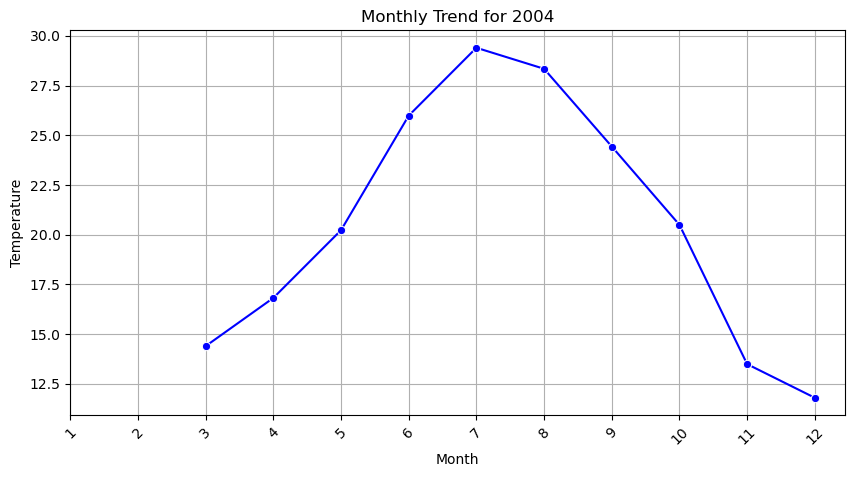

In [76]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2004_by_month, x='Month', y='T', marker='o', color='blue')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Monthly Trend for 2004')
plt.xticks(rotation=45)  # Rotate for better visibility
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()


In [77]:
#After groupby(), Month is now an index. Seaborn requires it as a column, so reset the index:
df_2005_by_month = df_2005_by_month.reset_index()


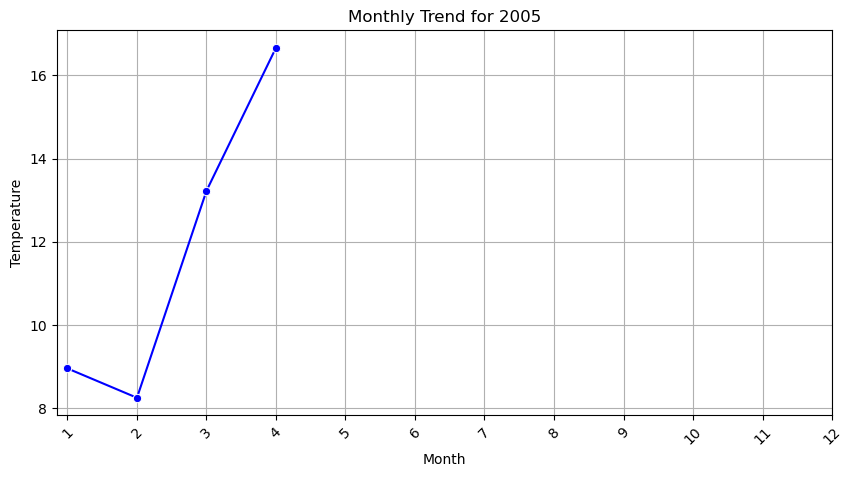

In [78]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_2005_by_month, x='Month', y='T', marker='o', color='blue')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Monthly Trend for 2005')
plt.xticks(rotation=45) # Rotate for better visibility
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()


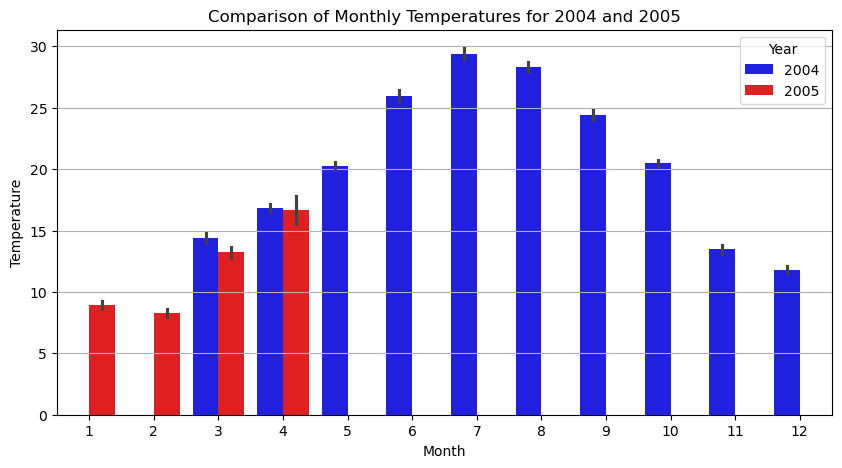

In [79]:

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2004_2005, x='Month', y='T', hue='Year', palette=['blue', 'red'])

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Comparison of Monthly Temperatures for 2004 and 2005')
plt.xticks(range(0, 12), range(1, 13))  # Ensure 1-12 are displayed
plt.legend(title='Year')
plt.grid(axis='y')

# Show plot
plt.show()

In [80]:
df_2004_2005_month_year = df_2004_2005.groupby(by=['Year','Month'])

In [85]:
df_2004_2005_month_year_median = df_2004_2005_month_year.median(numeric_only=True)


In [86]:
df_2004_2005_month_year_median

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
Year Month                                                                     
2004 3           1197.0      8.65          926.0         966.5        1543.0   
     4           1115.5      8.10          903.0         882.0        1555.0   
     5           1053.0      8.90          937.0         910.0        1565.0   
     6           1030.5      9.00          939.0         846.5        1683.0   
     7           1032.0      9.90          972.5         786.5        1607.5   
     8            987.5      6.60          840.0         807.0        1554.0   
     9           1053.0      9.50          958.5         794.0        1488.5   
     10          1159.5     11.10         1019.0         661.0        1576.5   
     11          1106.5     10.10          981.0         722.5        1313.5   
     12          1053.0      7.90          895.0         794.0        1219.5   
2005 1           1053.0      7.50          880.0         782.5        1147.0   
     2           1053.0      6.85          850.5         794.0        1039.0   
     3           1126.0      6.65          842.0         684.5        1217.5   
     4            925.0      3.30          669.0         906.0         936.0   

            PT08.S5(O3)      T     RH       AH   Day  
Year Month                                            
2004 3            992.5  14.05  52.20  0.79205  21.0  
     4            942.0  16.30  50.10  0.92410  15.5  
     5            911.5  19.10  44.30  0.96495  16.0  
     6            921.0  24.70  41.40  1.25735  15.5  
     7            942.0  28.05  33.10  1.20525  16.0  
     8            771.5  27.55  45.50  1.64800  16.0  
     9            969.5  23.60  44.75  1.27195  15.5  
     10          1115.0  20.30  63.00  1.51905  16.0  
     11          1150.5  13.25  60.60  0.95040  15.5  
     12           942.0  12.00  56.75  0.85780  16.0  
2005 1            992.0   8.10  54.75  0.65935  16.0  
     2            942.0   7.35  48.60  0.52080  14.5  
     3           1039.5  13.50  51.70  0.78525  16.0  
     4            556.0  15.10  35.60  0.59770   2.0

/tmp/ipykernel_21052/626808675.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2004_2005_month_year_median, x='Month', y='AH', palette='muted')


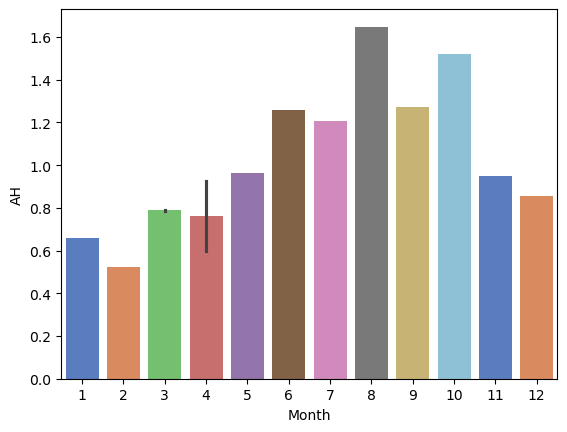

In [89]:
sns.barplot(data=df_2004_2005_month_year_median, x='Month', y='AH', palette='muted')
plt.grid(False)
plt.show()
